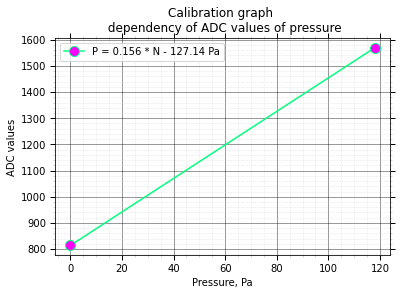

In [7]:
from matplotlib.pyplot import vlines 
import numpy as np 
from pathlib import Path 
import matplotlib.pyplot as plt



# Calibration 


points = [] 

file1 = 'jet-data_p=0 2021-11-30 18:01:34.txt'

file2 = 'jet-data_p=118 2021-11-30 18:13:33.txt'

def is_number(s):
    
    try:
        
        int(s)
        
        return True
    
    except ValueError:
        
        return False
    
temp = 0

i = 0 

with open(file1, 'r') as f:
    
    for l in f:
        
        if is_number(l):
            temp += int(l)
            i+=1

temp = temp/i

points.append(temp)

temp = 0

i = 0 

with open(file2, 'r') as f:
    
    for l in f:
        
        if is_number(l):
            temp += int(l)
            i+=1

temp = temp/i

points.append(temp)
        
p1 = 118 #measured pressure
p0 = 0 

pressure = [p0, p1] 

kPress = (p1 - p0) / (points[1] - points[0]) # coef of pressure
sValue = points[0] * kPress 


plt.plot(pressure, points, color = 'springgreen', label = "P = {} * N - {} Pa".format("%0.3f" % kPress, "%0.2f" % sValue), marker = 'o', markerfacecolor='fuchsia', markersize = 10)

#plt.xlim(np.min(np.array(pressure)), np.max(np.array(pressure)))
#plt.ylim(np.min(np.array(points)), np.max(np.array(points)))

plt.ylabel('ADC values')
plt.xlabel('Pressure, Pa')
        
plt.tick_params(axis = 'both', which = 'major', reset = True, direction = 'out', length = 5, width =1, color = 'k', zorder = 1, grid_color ='k', grid_alpha =0.8, grid_linewidth = 0.5)
plt.tick_params(axis = 'both', which = 'minor', reset = True, direction = 'out', length = 2, width =1, color = 'lightgray', zorder = 1,  grid_color ='lightgray', grid_alpha =0.6, grid_linewidth = 0.5, grid_linestyle = '--')

plt.minorticks_on()

plt.grid(b = True, which = 'both', axis = 'both')

plt.title('Calibration graph \n dependency of ADC values of pressure', loc = 'center')

plt.legend()
        
plt.savefig('pressure_calibration.png', dpi = 450)



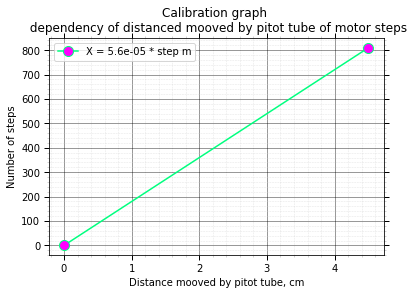

In [11]:

Steps = [0, 810] 
sm = [0, 4.5] 
kStep = (sm[1] - sm[0]) / (Steps[1] - Steps[0]) # distance coef

plt.plot(sm, Steps, color = 'springgreen', label = "X = {0:.1e} * step m".format(kStep / 100), marker = 'o', markerfacecolor='fuchsia', markersize = 10)

#plt.xlim(np.min(np.array(pressure)), np.max(np.array(pressure)))
#plt.ylim(np.min(np.array(points)), np.max(np.array(points)))

plt.ylabel('Number of steps')
plt.xlabel('Distance mooved by pitot tube, cm')
        
plt.tick_params(axis = 'both', which = 'major', reset = True, direction = 'out', length = 5, width =1, color = 'k', zorder = 1, grid_color ='k', grid_alpha =0.8, grid_linewidth = 0.5)
plt.tick_params(axis = 'both', which = 'minor', reset = True, direction = 'out', length = 2, width =1, color = 'lightgray', zorder = 1,  grid_color ='lightgray', grid_alpha =0.6, grid_linewidth = 0.5, grid_linestyle = '--')

plt.minorticks_on()

plt.grid(b = True, which = 'both', axis = 'both')

plt.title('Calibration graph \n dependency of distanced mooved by pitot tube of motor steps', loc = 'center')

plt.legend()
        
plt.savefig('distance_calibration.png', dpi = 450)

kStep = kStep * 10 # mm


<ipython-input-19-f1805f8c53f5>:285: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


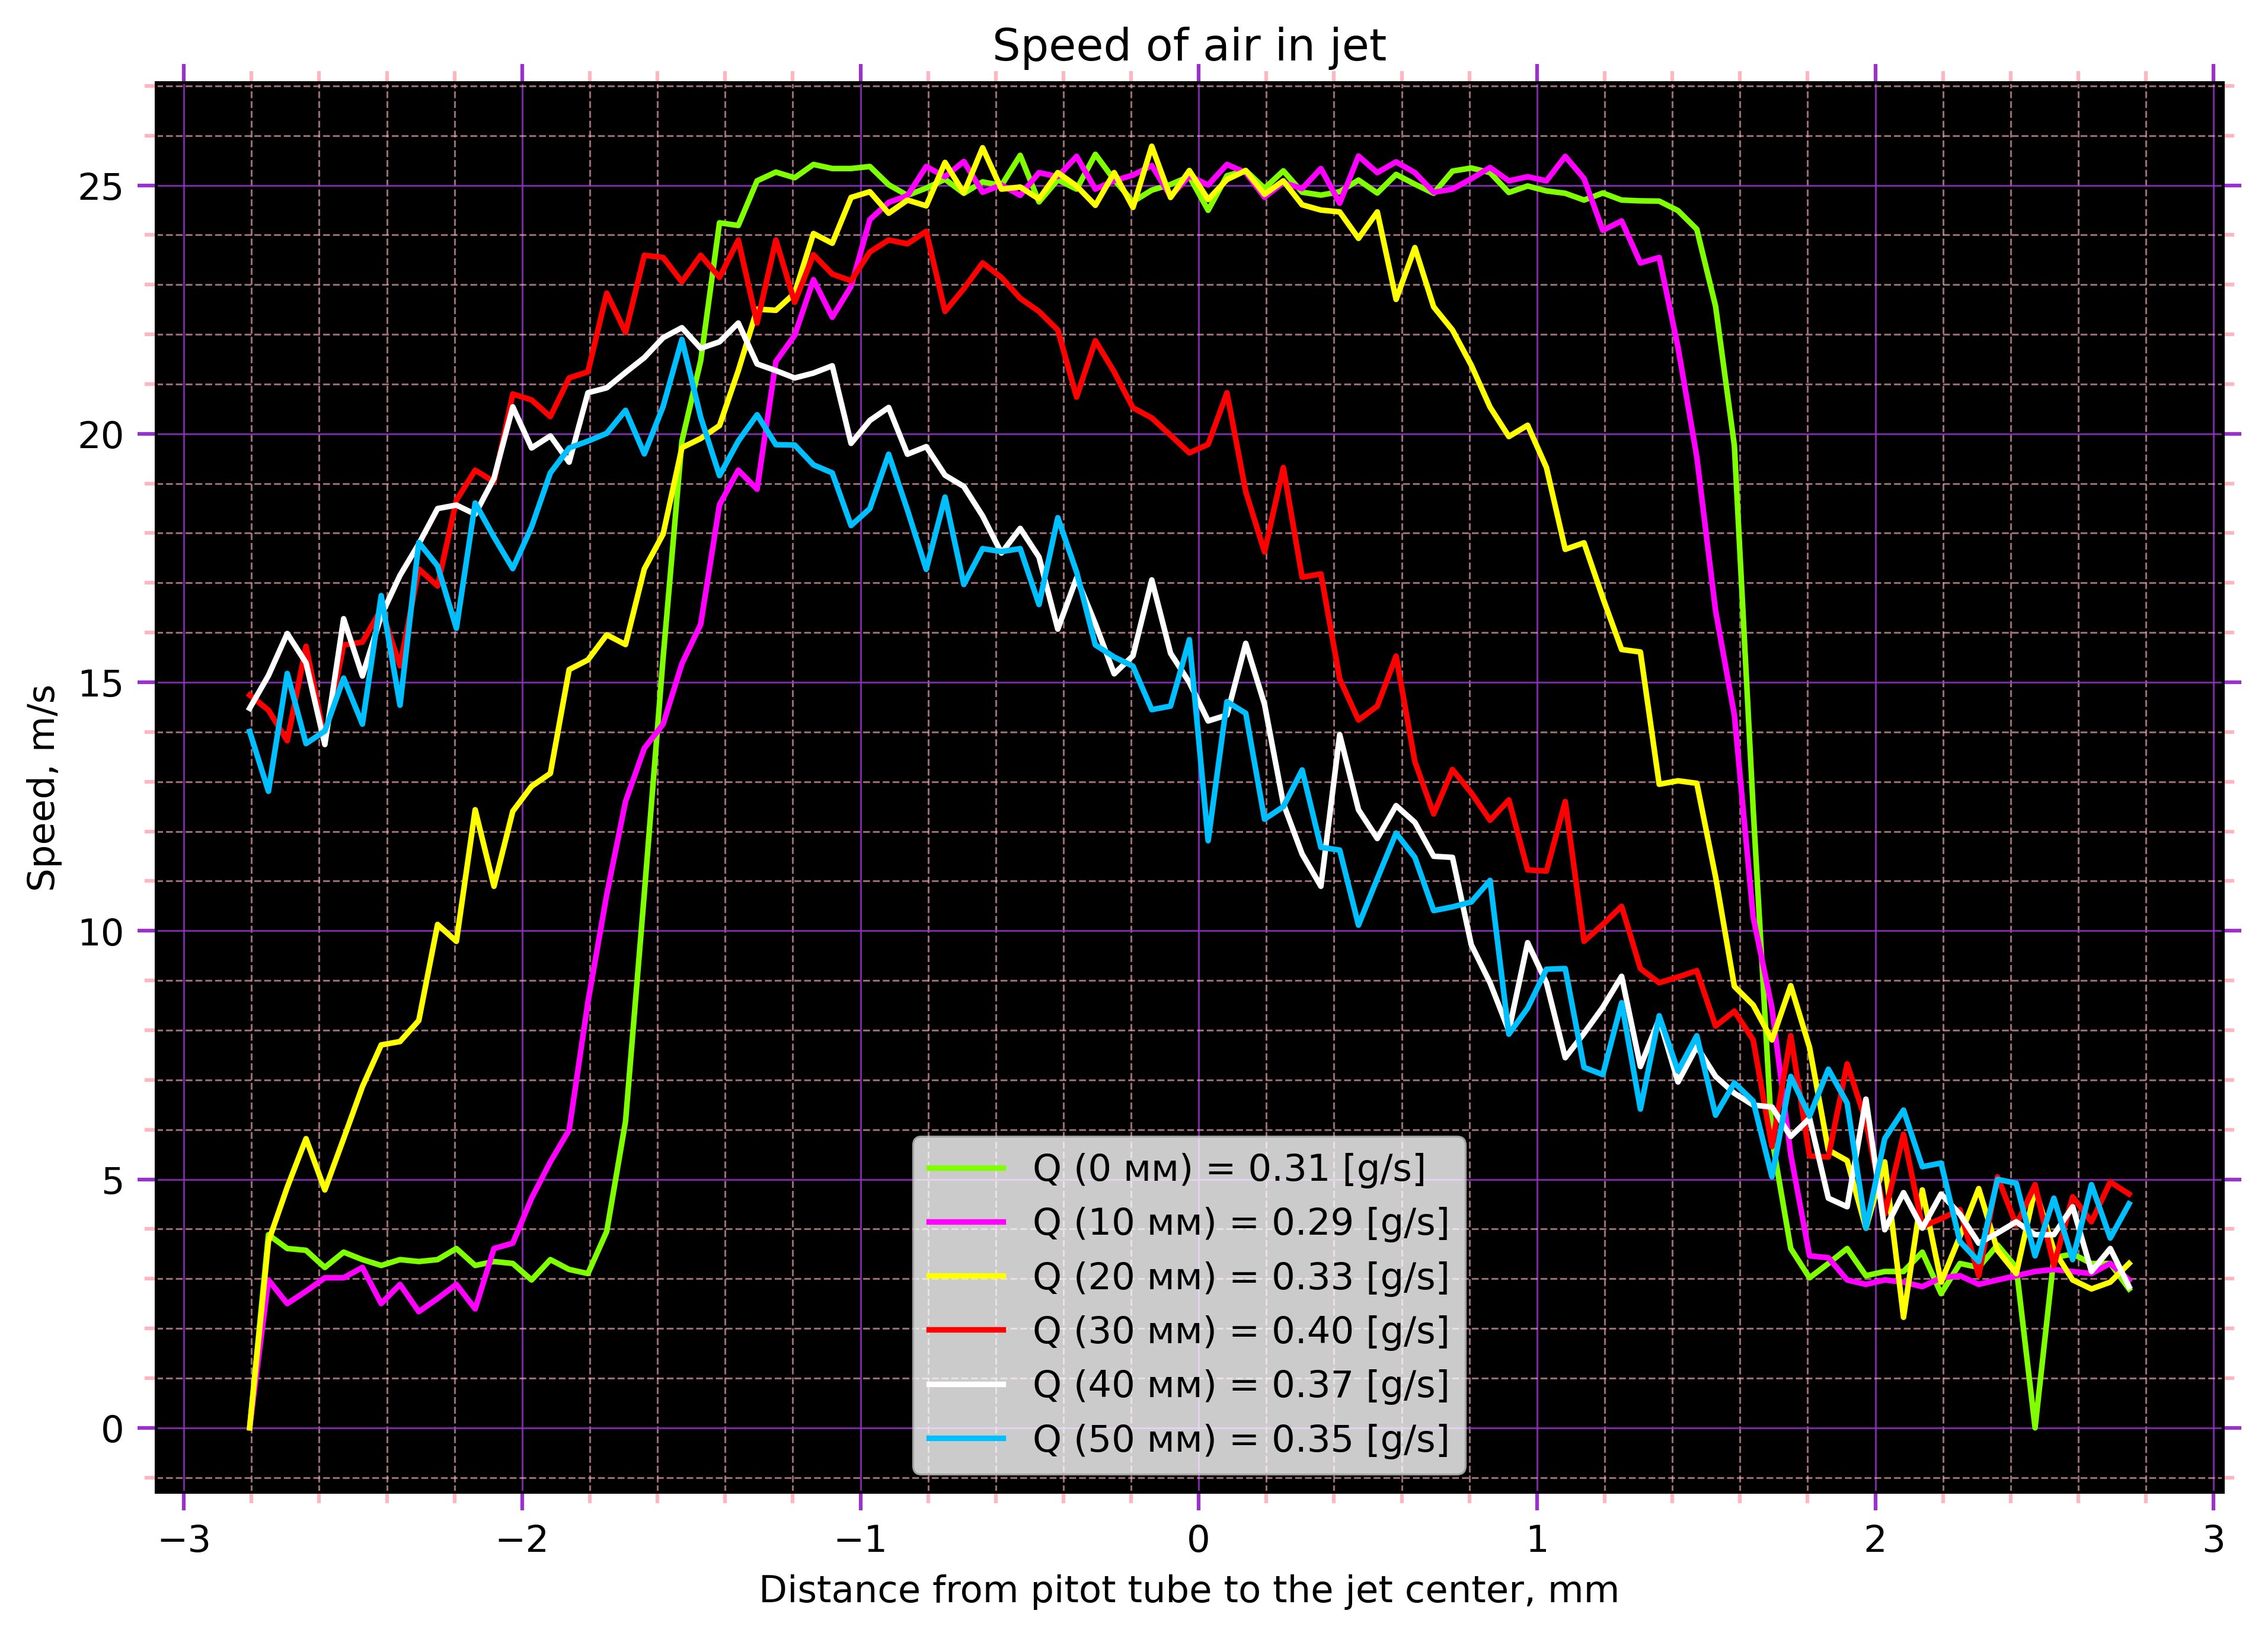

In [19]:

# Proscessing


from math import sqrt 
from math import pi 

kInt = 2 * pi * 1.2 * kStep 

file = '0мм.txt'

file1 = '10мм.txt'

file2 = '20мм.txt'

file3 = '30мм.txt'

file4 = '40мм.txt'

file5 = '50мм.txt'

#0

values = []

with open(file, 'r') as f:
    
    for l in f:
        
        if is_number(l):
            
            values.append(int(l))


ur = []

r = np.arange(- len(values) / 2, len(values) / 2) * kStep 

velocities = []

for i in range(len(values)): 
    
    dynPress = kPress*values[i] - sValue 
    
    if (dynPress < 2.5): 
        
        dynPress = 0 
        
    velocities.append(sqrt( 2 * abs(dynPress) / 1.2)) # velocity formula
    
    ur.append (velocities[i] * kInt * r[i] / 1000)
    
Q = 0 

for i in range (len(ur)): 
    
    Q += abs(ur[i]) 
    
Q = Q / 2 

#10

values1 = []

with open(file1, 'r') as f:
    
    for l in f:
        
        if is_number(l):
            
            values1.append(int(l))


ur1 = []

r1 = np.arange(- len(values1) / 2, len(values1) / 2) * kStep 

velocities1 = []

for i in range(len(values1)): 
    
    dynPress = kPress*values1[i] - sValue 
    
    if (dynPress < 2.5): 
        
        dynPress = 0 
        
    velocities1.append(sqrt( 2 * abs(dynPress) / 1.2)) # velocity formula
    
    ur1.append (velocities1[i] * kInt * r1[i] / 1000)
    
Q1 = 0 

for i in range (len(ur1)): 
    
    Q1 += abs(ur1[i]) 
    
Q1 = Q1 / 2 

#20

values2 = []

with open(file2, 'r') as f:
    
    for l in f:
        
        if is_number(l):
            
            values2.append(int(l))


ur2 = []

r2 = np.arange(- len(values2) / 2, len(values2) / 2) * kStep 

velocities2 = []

for i in range(len(values2)): 
    
    dynPress = kPress*values2[i] - sValue 
    
    if (dynPress < 2.5): 
        
        dynPress = 0 
        
    velocities2.append(sqrt( 2 * abs(dynPress) / 1.2)) # velocity formula
    
    ur2.append (velocities2[i] * kInt * r2[i] / 1000)
    
Q2 = 0 

for i in range (len(ur2)): 
    
    Q2 += abs(ur2[i]) 
    
Q2 = Q2 / 2 

#30

values3 = []

with open(file3, 'r') as f:
    
    for l in f:
        
        if is_number(l):
            
            values3.append(int(l))


ur3 = []

r3 = np.arange(- len(values3) / 2, len(values3) / 2) * kStep 

velocities3 = []

for i in range(len(values3)): 
    
    dynPress = kPress*values3[i] - sValue 
    
    if (dynPress < 2.5): 
        
        dynPress = 0 
        
    velocities3.append(sqrt( 2 * abs(dynPress) / 1.2)) # velocity formula
    
    ur3.append (velocities3[i] * kInt * r3[i] / 1000)
    
Q3 = 0 

for i in range (len(ur3)): 
    
    Q3 += abs(ur3[i]) 
    
Q3 = Q3 / 2 

#40

values4 = []

with open(file4, 'r') as f:
    
    for l in f:
        
        if is_number(l):
            
            values4.append(int(l))


ur4 = []

r4 = np.arange(- len(values4) / 2, len(values4) / 2) * kStep 

velocities4 = []

for i in range(len(values4)): 
    
    dynPress = kPress*values4[i] - sValue 
    
    if (dynPress < 2.5): 
        
        dynPress = 0 
        
    velocities4.append(sqrt( 2 * abs(dynPress) / 1.2)) # velocity formula
    
    ur4.append (velocities4[i] * kInt * r4[i] / 1000)
    
Q4 = 0 

for i in range (len(ur4)): 
    
    Q4 += abs(ur4[i]) 
    
Q4 = Q4 / 2 

#50

values5 = []

with open(file5, 'r') as f:
    
    for l in f:
        
        if is_number(l):
            
            values5.append(int(l))


ur5 = []

r5 = np.arange(- len(values5) / 2, len(values5) / 2) * kStep 

velocities5 = []

for i in range(len(values5)): 
    
    dynPress = kPress*values5[i] - sValue 
    
    if (dynPress < 2.5): 
        
        dynPress = 0 
        
    velocities5.append(sqrt( 2 * abs(dynPress) / 1.2)) # velocity formula
    
    ur5.append (velocities5[i] * kInt * r5[i] / 1000)
    
Q5 = 0 

for i in range (len(ur5)): 
    
    Q5 += abs(ur5[i]) 
    
Q5 = Q5 / 2 

fig = plt.figure(figsize=(10, 7), dpi=450)

plt.plot(r, velocities, color = 'chartreuse', label = "Q (0 мм) = {} [g/s]".format("%0.2f" % Q))

plt.plot(r1, velocities1, color = 'fuchsia', label = "Q (10 мм) = {} [g/s]".format("%0.2f" % Q1))
plt.plot(r2, velocities2, color = 'yellow', label = "Q (20 мм) = {} [g/s]".format("%0.2f" % Q2))

plt.plot(r3, velocities3, color = 'red', label = "Q (30 мм) = {} [g/s]".format("%0.2f" % Q3))
plt.plot(r4, velocities4, color = 'w', label = "Q (40 мм) = {} [g/s]".format("%0.2f" % Q4))

plt.plot(r5, velocities5, color = 'deepskyblue', label = "Q (50 мм) = {} [g/s]".format("%0.2f" % Q5))

#plt.xlim(np.min(np.array(pressure)), np.max(np.array(pressure)))
#plt.ylim(np.min(np.array(points)), np.max(np.array(points)))

plt.ylabel('Speed, m/s')
plt.xlabel('Distance from pitot tube to the jet center, mm')
        
plt.tick_params(axis = 'both', which = 'major', reset = True, direction = 'out', length = 5, width =1, color = 'darkorchid', zorder = 1, grid_color ='darkorchid', grid_alpha =0.8, grid_linewidth = 0.5)
plt.tick_params(axis = 'both', which = 'minor', reset = True, direction = 'out', length = 3, width =1, color = 'lightpink', zorder = 1,  grid_color ='lightpink', grid_alpha =0.6, grid_linewidth = 0.5, grid_linestyle = '--')

plt.minorticks_on()

plt.grid(b = True, which = 'both', axis = 'both')

plt.title('Speed of air in jet', loc = 'center')

plt.legend()

ax = fig.add_subplot(111)

ax.patch.set_facecolor('k')
ax.patch.set_alpha(1.0)
        
plt.savefig('speed.png', dpi = 450)